In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
#K.set_image_data_format(‘channels_last’)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
path = r'C:\Users\patel\OneDrive\Desktop\NMIMS\Study Material\Summer internship\Blade Image Dataset\Blade_Turbine_Set'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 3369 images belonging to 4 classes.


In [ ]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 4)
Image Size of first image :  (227, 227, 3)
Output of first image :  (4,)


C:\Users\patel\anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 1. 0.]')

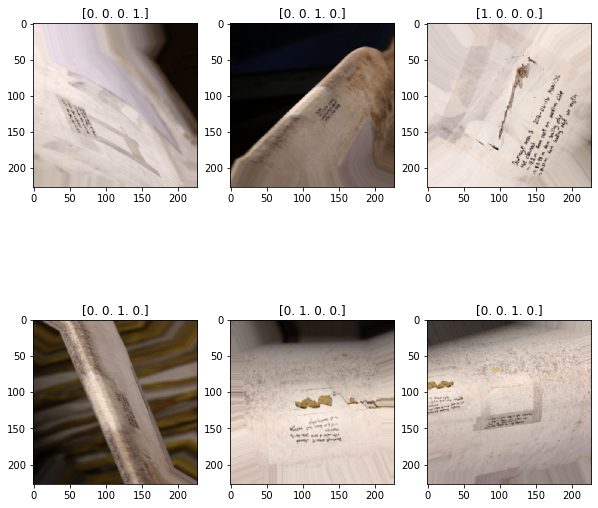

In [ ]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [ ]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    X = Dense(4,activation='softmax',name = 'fc2')(X)
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    
    return model

In [ ]:
alex = AlexNet(train[0][0].shape[1:])

In [ ]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv0 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 55, 55, 96)        384       
_________________________________________________________________
activation_5 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 27, 27, 96)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 27, 27, 256)       1024

In [ ]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
history = alex.fit_generator(train,epochs=20)

Epoch 1/20
106/106 [==============================] - 174s 2s/step - loss: 16.9085 - accuracy: 0.3115
Epoch 2/20
106/106 [==============================] - 174s 2s/step - loss: 1.1001 - accuracy: 0.4920
Epoch 3/20
106/106 [==============================] - 175s 2s/step - loss: 0.8042 - accuracy: 0.6766
Epoch 4/20
106/106 [==============================] - 171s 2s/step - loss: 0.4771 - accuracy: 0.8130
Epoch 5/20
106/106 [==============================] - 178s 2s/step - loss: 0.3391 - accuracy: 0.8740
Epoch 6/20
106/106 [==============================] - 200s 2s/step - loss: 0.1921 - accuracy: 0.9330
Epoch 7/20
106/106 [==============================] - 454s 4s/step - loss: 0.2604 - accuracy: 0.9090
Epoch 8/20
106/106 [==============================] - 167s 2s/step - loss: 0.1339 - accuracy: 0.9519
Epoch 9/20
106/106 [==============================] - 173s 2s/step - loss: 0.1427 - accuracy: 0.9504
Epoch 10/20
106/106 [==============================] - 170s 2s/step - loss: 0.1206 - accur

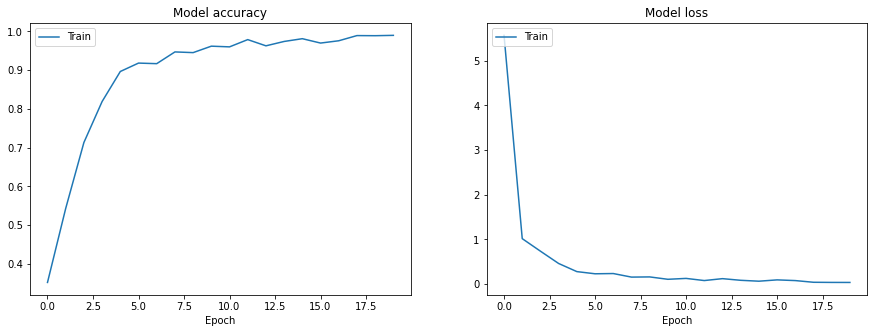

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(history.history['accuracy'])
#axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(history.history['loss'])
#axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

In [ ]:
score = alex.evaluate_generator(train, steps= len(train))

for idx, metric in enumerate(alex.metrics_names):
    print('{}:{}'.format(metric, score[idx]))

loss:1.1928510665893555
accuracy:0.7215790748596191


In [ ]:
path_test = r'C:\Users\patel\OneDrive\Desktop\NMIMS\Study Material\Summer internship\Blade Image Dataset\Turbine_Test'
test_datagen = ImageDataGenerator(rotation_range=25,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        horizontal_flip=True, rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 196 images belonging to 4 classes.


In [ ]:
preds = alex.evaluate_generator(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

Loss = 1.2560073137283325
Test Accuracy = 0.7193877696990967
